# Problem Statement:
predict whether the customer will churn in next month so business can proactively retain them. 
Input = customer behavior, usage pattern subscription info. 
Output = churn probability (0-1). 
Success metrix = model accuracy, recall, precision and expected momentary retention uplift.

# About Dataset:
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

### Detailed Dataset columns:

1. **customerID** = Customer ID
2. **gender** = Whether the customer is a male or a female
3. **SeniorCitizen** = Whether the customer is a senior citizen or not (1, 0)
4. **Partner** = Whether the customer has a partner or not (Yes, No)
5. **Dependants** = Whether the customer has dependents or not (Yes, No)
6. **tenure** = Number of months the customer has stayed with the company
7. **PhoneService** = Whether the customer has a phone service or not (Yes, No)
8. **MultipleLines** = Whether the customer has multiple lines or not (Yes, No, No phone service)
9. **InternetService** = Customer’s internet service provider (DSL, Fiber optic, No)
10. **OnlineSecurity** = Whether the customer has online security or not (Yes, No, No internet service)

## 1. Importing all the essential packages and modules

In [1]:
# Regular EDA and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

## 2. Loading the data and splitting it into training and testing sets and performing EDA

In [2]:
df = pd.read_csv("Complete-data-set.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
len(df)

7043

In [4]:
# Creating a copy of dataset so the original is not affected
df_tmp = df.copy()

In [5]:
# Checking for any null or nan value
df_tmp.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0, 0.5, 'No. of people')

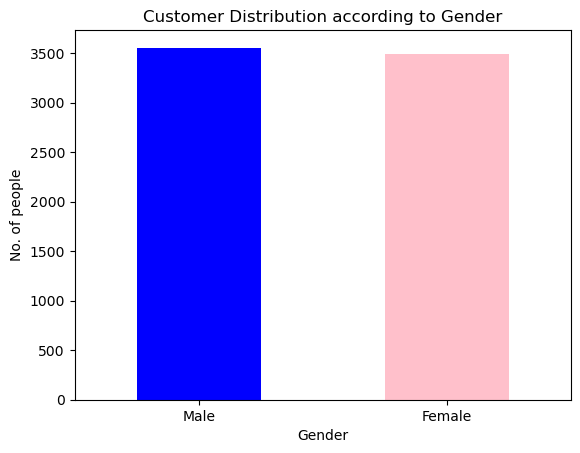

In [6]:
df_tmp["gender"].value_counts().plot(kind = 'bar', color = ['blue', 'pink']);
plt.xticks(rotation = 0)
plt.title("Customer Distribution according to Gender")
plt.xlabel("Gender")
plt.ylabel("No. of people")

Text(0, 0.5, 'No. of people')

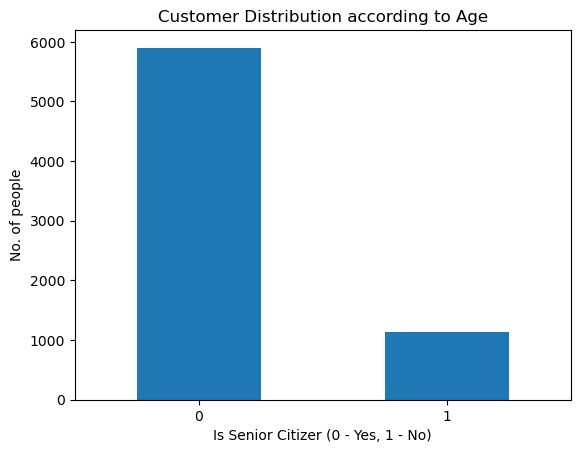

In [7]:
df_tmp["SeniorCitizen"].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 0)
plt.title("Customer Distribution according to Age")
plt.xlabel("Is Senior Citizer (0 - Yes, 1 - No)")
plt.ylabel("No. of people")

Text(0, 0.5, 'No. of people')

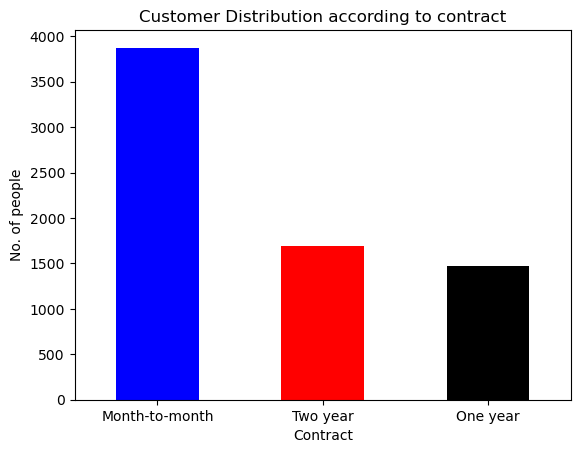

In [8]:
df_tmp["Contract"].value_counts().plot(kind = 'bar', color = ['blue', 'red', 'black']);
plt.xticks(rotation = 0)
plt.title("Customer Distribution according to contract")
plt.xlabel("Contract")
plt.ylabel("No. of people")

Text(0.5, 1.0, 'Churn Rate according to the gender')

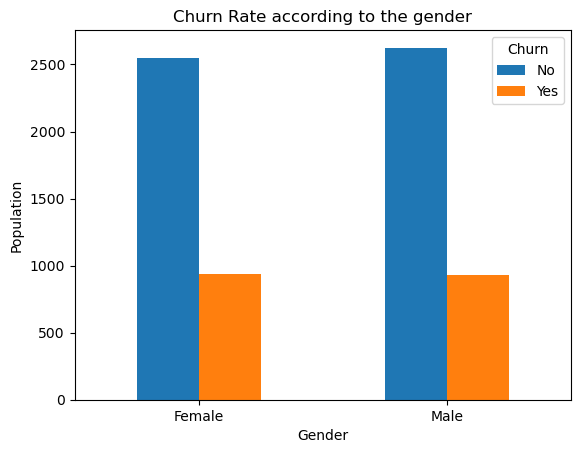

In [9]:
pd.crosstab(df_tmp["gender"], df_tmp["Churn"]).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Gender")
plt.ylabel("Population")
plt.title("Churn Rate according to the gender")

Text(0.5, 1.0, 'Churn Rate according to the Contract')

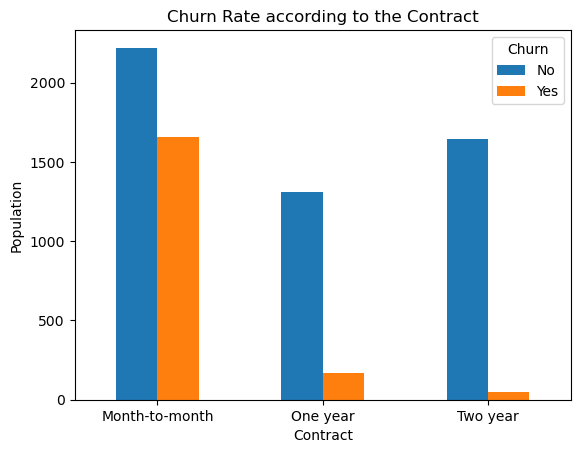

In [10]:
pd.crosstab(df_tmp["Contract"], df_tmp["Churn"]).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Contract")
plt.ylabel("Population")
plt.title("Churn Rate according to the Contract")

In [11]:
df_tmp.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
# Handle TotalCharges: Convert to numeric, fill missing (blanks become NaN, fill with 0)
df_tmp["TotalCharges"] = pd.to_numeric(df_tmp["TotalCharges"], errors="coerce").fillna(0)

In [13]:
# Map Churn to binary (1 for Yes, 0 for No)
df_tmp["Churn"] = df_tmp["Churn"].map({"Yes": 1, "No": 0})

In [14]:
# Drop only customerID
df_tmp.drop("customerID",axis=1, inplace=True)

In [15]:
df_tmp.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [16]:
# Categorical columns (need OneHotEncoding)
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Numerical columns (keep as is)
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keeps numerical features unchanged
)

# Split into X and Y
X = df_tmp.drop('Churn', axis=1)
Y = df_tmp['Churn']

# Apply transformation to X
X_transformed = transformer.fit_transform(X)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.15, random_state=42)

## Training the model

In [19]:
# Initial models without hyper parameter tunning

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
model_scores

/Users/harshalpatil/Desktop/Basics of AI, Ml and DS/Self-learning project (classification problem)/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8211920529801324,
 'KNN': 0.7748344370860927,
 'Random Forest': 0.7918637653736992}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

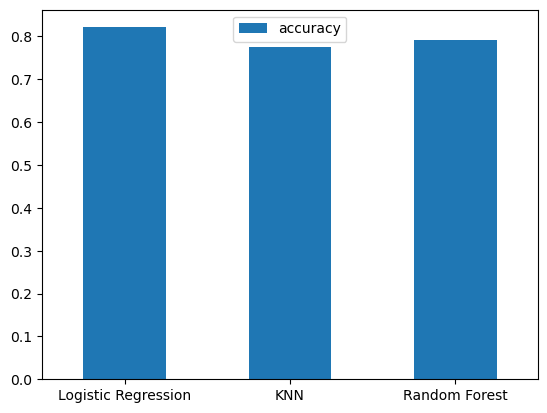

In [21]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"]);
model_compare.T.plot(kind='bar');
plt.xticks(rotation = 0)

In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Expanded parameter grids for each model to improve hyperparameter search
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'], # Note: Not all solvers support all penalties
        'max_iter': [100, 200, 500]
    },
    "KNN": {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10, 20, 30, 40, 50]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }
}

def fit_and_score(models, param_grids, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        grid_search = GridSearchCV(estimator=model,
                                   param_grid=param_grids[name],
                                   cv=5, # 5-fold cross-validation
                                   scoring=['accuracy', 'precision', 'recall'],
                                   refit='accuracy',  # Refit on accuracy for multi-metric scoring
                                   n_jobs=-1, # Use all available cores
                                   verbose=1) # Show progress
        grid_search.fit(X_train, Y_train)
        best_model = grid_search.best_estimator_
        model_scores[name] = best_model.score(X_test, Y_test)
    return model_scores  # Return after all models are processed

In [31]:
%%time
model_scores = fit_and_score(models, param_grids=param_grids, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
model_scores

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


/Users/harshalpatil/Desktop/Basics of AI, Ml and DS/Self-learning project (classification problem)/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/harshalpatil/Desktop/Basics of AI, Ml and DS/Self-learning project (classification problem)/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Users/harshalpatil/Desktop/Basics of AI, Ml and DS/Self-learning project (classification problem)/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated 

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fitting 5 folds for each of 4500 candidates, totalling 22500 fits
CPU times: user 35.4 s, sys: 18.2 s, total: 53.5 s
Wall time: 2h 26min 52s


KeyboardInterrupt: 